In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Resample Data Into New Dataset

# Resample Train Data

In [2]:
from common.src import resample as res

In [3]:
from imblearn.over_sampling import SMOTE

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
SM = SMOTE(random_state=0)

In [4]:
res.resample_directory(SM, path, 'SMOTE', val = False)

# Load Data

In [5]:
train_folder= './common/data/resampled/SMOTE/train'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

Set up Training Folders

In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

Set up Testing Folders

In [7]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

# Generate Dataset from image data

In [8]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/resampled/SMOTE/train')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False) 

Found 7750 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [9]:
from common.src import models

cnn = models.CNNModel(patience_s=49)
cnn.create_model()
cnn.summary()

# Fit Model

In [10]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs=50)

Epoch 1/50
163/163 [==============================] - 13s 81ms/step - loss: 0.3159 - tp: 4448.0000 - fp: 768.0000 - tn: 4422.0000 - fn: 742.0000 - accuracy: 0.8545 - precision: 0.8528 - recall: 0.8570 - auc: 0.9387 - val_loss: 0.4210 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.8887
Epoch 2/50
163/163 [==============================] - 10s 62ms/step - loss: 0.1877 - tp: 4809.0000 - fp: 405.0000 - tn: 4811.0000 - fn: 407.0000 - accuracy: 0.9222 - precision: 0.9223 - recall: 0.9220 - auc: 0.9787 - val_loss: 0.4095 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.8945
Epoch 3/50
163/163 [==============================] - 9s 58ms/step - loss: 0.1664 - tp: 4824.0000 - fp: 364.0000 - tn: 4826.0000 - fn: 366.0000 - accuracy: 0.9297 - precision: 0.9298 - recall: 0.9295 - auc: 0.982

Epoch 22/50
163/163 [==============================] - 9s 57ms/step - loss: 0.0939 - tp: 5020.0000 - fp: 170.0000 - tn: 5020.0000 - fn: 170.0000 - accuracy: 0.9672 - precision: 0.9672 - recall: 0.9672 - auc: 0.9938 - val_loss: 0.3881 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9102
Epoch 23/50
163/163 [==============================] - 9s 57ms/step - loss: 0.0961 - tp: 4983.0000 - fp: 203.0000 - tn: 4987.0000 - fn: 207.0000 - accuracy: 0.9605 - precision: 0.9609 - recall: 0.9601 - auc: 0.9942 - val_loss: 0.3073 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9219
Epoch 24/50
163/163 [==============================] - 9s 57ms/step - loss: 0.0829 - tp: 5031.0000 - fp: 159.0000 - tn: 5031.0000 - fn: 159.0000 - accuracy: 0.9694 - precision: 0.9694 - recall: 0.9694 - auc: 0.99

163/163 [==============================] - 9s 57ms/step - loss: 0.0649 - tp: 5056.0000 - fp: 135.0000 - tn: 5055.0000 - fn: 134.0000 - accuracy: 0.9741 - precision: 0.9740 - recall: 0.9742 - auc: 0.9973 - val_loss: 0.3731 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9219
Epoch 43/50
163/163 [==============================] - 9s 56ms/step - loss: 0.0651 - tp: 5064.0000 - fp: 128.0000 - tn: 5062.0000 - fn: 126.0000 - accuracy: 0.9755 - precision: 0.9753 - recall: 0.9757 - auc: 0.9970 - val_loss: 0.5300 - val_tp: 228.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 76.0000 - val_accuracy: 0.7188 - val_precision: 0.7059 - val_recall: 0.7500 - val_auc: 0.8438
Epoch 44/50
163/163 [==============================] - 9s 57ms/step - loss: 0.0729 - tp: 5040.0000 - fp: 150.0000 - tn: 5040.0000 - fn: 150.0000 - accuracy: 0.9711 - precision: 0.9711 - recall: 0.9711 - auc: 0.9966 - val_los

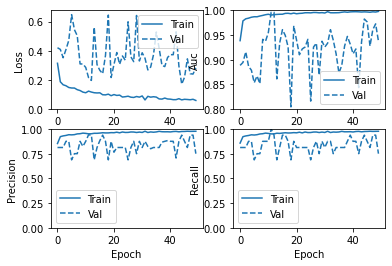

In [11]:
cnn.plot_history()

In [12]:
cnn.get_classification_report(test_set)

              precision    recall  f1-score   support

      NORMAL       0.92      0.82      0.87       234
   PNEUMONIA       0.90      0.96      0.93       390

    accuracy                           0.91       624
   macro avg       0.91      0.89      0.90       624
weighted avg       0.91      0.91      0.90       624



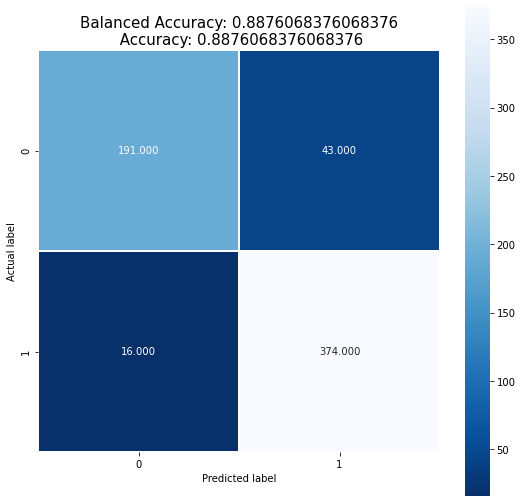

In [13]:
cnn.display_confusion_matrix(test_set)